Find the main "engine" in `./galxe_parser.py` and the output in `out.tab`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import time

In [2]:
wdir = '~\\Documents\\Python Scripts\\'

In [3]:
f = go.FigureWidget(make_subplots(specs=[[{"secondary_y": True}]]))
f.update_xaxes(title_text="Time")
f.update_yaxes(title_text="<b>Total</b> users", secondary_y=False)
f.update_yaxes(title_text="<b>NEW</b> users", secondary_y=True)
f.update_layout(title_text='Participants of the 8th week of Linea Vouage', title_font_size=20,title_x=0.5)
f

FigureWidget({
    'data': [],
    'layout': {'template': '...',
               'title': {'font': {'size': 20}…

Run this:

In [ ]:
df = pd.read_csv(wdir+'out.tab', sep='\t', index_col=None, header=0, names=['Time', 'N'])
df['NewUsers'] = df.N.diff() 

f.add_trace(
    go.Scatter(x=df.Time, y=df.N, name="All users"),
    secondary_y=False,
)

f.add_trace(
    go.Scatter(x=df.Time, y=df.NewUsers, name="New users"),
    secondary_y=True,
)

while True:
    df = pd.read_csv(wdir+'out.tab', sep='\t', index_col=None, header=0, names=['Time', 'N'])
    df['Time_'] = pd.to_datetime(df['Time'])
    #df.set_index(df.Time_, inplace=True)
    df_r = df.resample("20Min", on='Time_').mean()
    df_r['NewUsers'] = df_r['N'].diff() 

    scatter_All = f.data[0]
    scatter_All.x = df_r.index
    scatter_All.y = df_r.N

    scatter_New = f.data[1]
    scatter_New.x = df_r.index
    scatter_New.y = df_r.NewUsers
    
    time.sleep(12)

`matplotlib`-based

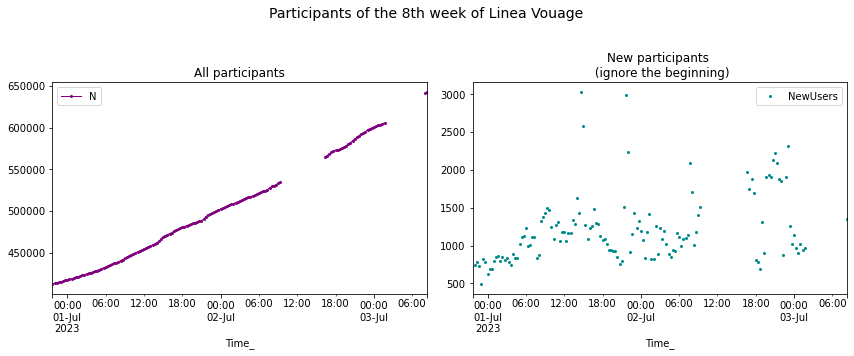

In [4]:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

df = pd.read_csv(wdir+'out.tab', sep='\t', index_col=None, header=0, names=['Time', 'N'])
df['Time_'] = pd.to_datetime(df['Time'])
#df.set_index(df.Time_, inplace=True)
df_r = df.resample("20Min", on='Time_').mean()
df_r['NewUsers'] = df_r['N'].diff() 

df_r.reset_index().plot(x='Time_', y='N', lw=1, marker='o', color='purple', markersize=2, ax=ax1)
df_r.reset_index().plot(x='Time_', y='NewUsers', lw=0, marker='o', color='darkcyan', markersize=2, ax=ax2)

fig.suptitle('Participants of the 8th week of Linea Vouage \n', fontsize=14)
ax1.set_title('All participants')
ax2.set_title('New participants')
fig.tight_layout()
plt.show()

---------